<a href="https://colab.research.google.com/github/ShathaCodes/IrisSupervisedLearning/blob/main/IrisSupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
from itertools import cycle
import matplotlib
import pylab as pl
import collections
import numpy as np
import random
from sklearn import datasets
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#  I- Jeux de données : Dataset
dataset =  deux dictionnaires :

**.data** qui stocke un tableau description des données en termes d'attributs


**.target** qui stocke les classes (étiquettes) de chaque instance (dans le cas supervisé).

In [ ]:
irisData = datasets.load_iris()

#2.a.1
print (irisData.data.shape)
print (irisData.target.shape)

print (irisData.feature_names)
print(irisData.target_names)

#2.a.2
k = collections.Counter(irisData.target)
print(k)
for i in range(0,3):
  print("Len nombre d'instance de la classe ", irisData.target_names[i] ,  " est " , k[i])

#2.a.3
print(irisData.data[31])
print(irisData.target[31])

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
Counter({0: 50, 1: 50, 2: 50})
Len nombre d'instance de la classe  setosa  est  50
Len nombre d'instance de la classe  versicolor  est  50
Len nombre d'instance de la classe  virginica  est  50
[5.4 3.4 1.5 0.4]
0


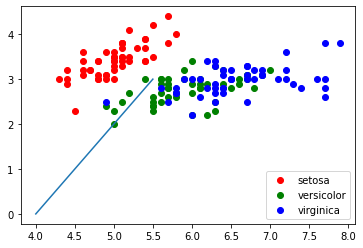

In [ ]:
def plot_2D(data, target, target_names):
 colors = cycle('rgbcmykw') # cycle de couleurs
 target_ids = range(len(target_names))
 pl.figure()
 for i, c, label in zip(target_ids, colors, target_names):
  pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
 pl.plot([4,5.5],[0,3])
 pl.legend()
 pl.show()

plot_2D(irisData.data, irisData.target, irisData.target_names)

# II- Un premier apprentissage de classiffieur

In [ ]:
nb = naive_bayes.MultinomialNB(fit_prior=True) # un algo d'apprentissage
irisData = datasets.load_iris()
nb.fit(irisData.data[:], irisData.target[:])
p31 = nb.predict([irisData.data[31]])
print (p31)
plast = nb.predict([irisData.data[-1]])
print (plast)
p = nb.predict(irisData.data[:])
print (p)

k1 = collections.Counter(irisData.target==p)
print("accuracy = " , k1[True]/150)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy =  0.9533333333333334


In [ ]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
p=nb.predict(irisData.data[100:149])
print(p)

# it didn't train on the third class => 100% error
k2 = collections.Counter(irisData.target[100:149]==p)
print("accuracy = " , k2[True]/50)

#we need to shuffle

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.0


# III- Evaluer les performances d'un classiffieur

Il faut que l'erreur d'apprentissage ~ erreur de test => eviter surapprentissage

unbalanced dataset (classe majoritaire) => methode d'augmentation de données (oversampling/undersampling) 

In [ ]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
irisData = datasets.load_iris()
nb.fit(irisData.data[:], irisData.target[:])
predicted = nb.predict(irisData.data[:])

### Performances sur l'ensemble d'apprentissage

In [ ]:
def erreur_apprentissage(data,predicted,target):
    ea = 0
    for i in range(len(data)):
        if (predicted[i] != target[i]):
            ea = ea+1
    return ea/len(data)

In [ ]:
def erreur_apprentissage_2(data,predicted,target):
    ea = np.count_nonzero(predicted-target)
    return ea/len(data)

In [ ]:
def erreur_apprentissage_3(clf,test_samples,target):
    ea= 1 - clf.score(test_samples,target)
    return ea

In [ ]:
print("erreur 1 = ", erreur_apprentissage(irisData.data,predicted,irisData.target))
print("erreur 1 = ", erreur_apprentissage_2(irisData.data,predicted,irisData.target))
print("erreur 1 = ", erreur_apprentissage_3(nb,irisData.data,irisData.target))

erreur 1 =  0.04666666666666667
erreur 1 =  0.04666666666666667
erreur 1 =  0.046666666666666634


### Performances en généralisation

In [ ]:
def split(S,test_size=1/3):
  X,y = S
  rand_dist = np.random.rand(len(X)) < (1-test_size)
  dataS1= X[rand_dist]
  targetS1= y[rand_dist]
  dataS2= X[~rand_dist]
  targetS2= y[~rand_dist]
  return [dataS1, targetS1, dataS2, targetS2]
#split((irisData.data, irisData.target))

In [ ]:
def test(S,clf,choice,test_size=1/3):
  if choice == 1 :
    dataS1, targetS1, dataS2, targetS2 = split((irisData.data, irisData.target),test_size)
  else:
    dataS1, dataS2, targetS1, targetS2 = train_test_split(irisData.data, irisData.target, test_size=test_size)
  clf.fit(dataS1,targetS1)
  clf.predict(dataS2)
  acc = clf.score(dataS2,targetS2)
  return (1-acc)

test(irisData, naive_bayes.MultinomialNB(fit_prior=True),2)

0.06000000000000005

L'erreur estimée est-elle plus petite que l'erreur apparente précédemment calculée ? **Oui**

Obtient-on toujours la même estimation pour l'erreur réelle? **Non, la valeur change a chaque execution**

In [ ]:
def t_test(t,choice=1,test_size=1/3):
  S = (irisData.data,irisData.target)
  clf = naive_bayes.MultinomialNB(fit_prior=True)
  e = 0
  for i in range(t):
    e += test(S,clf,choice,test_size)
  return e/t

In [ ]:
print("la valeur d'erreur avec t=10 est ",  t_test(10))
print("la valeur d'erreur avec t=50 est ",  t_test(50))
print("la valeur d'erreur avec t=100 est ",  t_test(100))
print("la valeur d'erreur avec t=200 est ",  t_test(200))
print("la valeur d'erreur avec t=1000 est ",  t_test(1000))
print("la valeur d'erreur avec t=10000 est ",  t_test(10000))
print("la valeur d'erreur avec t=20000 est ",  t_test(20000))

la valeur d'erreur avec t=10 est  0.1530975214948944
la valeur d'erreur avec t=50 est  0.22172901387851723
la valeur d'erreur avec t=100 est  0.2142591141093831
la valeur d'erreur avec t=200 est  0.20266207542150994
la valeur d'erreur avec t=1000 est  0.19280688510272503
la valeur d'erreur avec t=10000 est  0.2011073242253351
la valeur d'erreur avec t=20000 est  0.19986121501867835


In [ ]:
for i in range(20):
  print(i, " - la valeur d'erreur avec t=10 est ",  t_test(10))

0  - la valeur d'erreur avec t=10 est  0.25064785368745485
1  - la valeur d'erreur avec t=10 est  0.22727450731200624
2  - la valeur d'erreur avec t=10 est  0.22867099107808517
3  - la valeur d'erreur avec t=10 est  0.13556007749578797
4  - la valeur d'erreur avec t=10 est  0.2275403414286096
5  - la valeur d'erreur avec t=10 est  0.25089787662765317
6  - la valeur d'erreur avec t=10 est  0.2635463786692921
7  - la valeur d'erreur avec t=10 est  0.15547008036262677
8  - la valeur d'erreur avec t=10 est  0.26870027344705705
9  - la valeur d'erreur avec t=10 est  0.19699168410110662
10  - la valeur d'erreur avec t=10 est  0.144380911823998
11  - la valeur d'erreur avec t=10 est  0.22330534827146406
12  - la valeur d'erreur avec t=10 est  0.21479204256953616
13  - la valeur d'erreur avec t=10 est  0.28924525199029105
14  - la valeur d'erreur avec t=10 est  0.18276115999249318
15  - la valeur d'erreur avec t=10 est  0.2671812750732203
16  - la valeur d'erreur avec t=10 est  0.2539411489068

pour chaque t, est-ce que l'erreur moyenne est stable ou non ? Pouvez-vous interpréter ce résultat ? **non il n'est pas stable.**

In [ ]:
print("fonction split et test_size=0.1")
print("la valeur d'erreur avec t=10 est ",  t_test(10,1,test_size=0.1))
print("la valeur d'erreur avec t=50 est ",  t_test(50,1,test_size=0.1))
print("la valeur d'erreur avec t=100 est ",  t_test(100,1,test_size=0.1))
print("la valeur d'erreur avec t=200 est ",  t_test(200,1,test_size=0.1))
print("la valeur d'erreur avec t=1000 est ",  t_test(1000,1,test_size=0.1))

fonction split et test_size=0.1
la valeur d'erreur avec t=10 est  0.12675865800865802
la valeur d'erreur avec t=50 est  0.13048570690164443
la valeur d'erreur avec t=100 est  0.13771252264060846
la valeur d'erreur avec t=200 est  0.13091962486837128
la valeur d'erreur avec t=1000 est  0.12266069925552744


In [ ]:
print("Fonction predefinis et test_size=0.33")
print("la valeur d'erreur avec t=10 est ",  t_test(10,2))
print("la valeur d'erreur avec t=50 est ",  t_test(50,2))
print("la valeur d'erreur avec t=100 est ",  t_test(100,2))
print("la valeur d'erreur avec t=200 est ",  t_test(200,2))
print("la valeur d'erreur avec t=1000 est ",  t_test(1000,2))

Fonction predefinis et test_size=0.33
la valeur d'erreur avec t=10 est  0.148
la valeur d'erreur avec t=50 est  0.18159999999999996
la valeur d'erreur avec t=100 est  0.1654000000000001
la valeur d'erreur avec t=200 est  0.19560000000000005
la valeur d'erreur avec t=1000 est  0.20110000000000008


In [ ]:
print("Fonction predefinis et test_size=0.1")
print("la valeur d'erreur avec t=10 est ",  t_test(10,2,test_size=0.1))
print("la valeur d'erreur avec t=50 est ",  t_test(50,2,test_size=0.1))
print("la valeur d'erreur avec t=100 est ",  t_test(100,2,test_size=0.1))
print("la valeur d'erreur avec t=200 est ",  t_test(200,2,test_size=0.1))
print("la valeur d'erreur avec t=1000 est ",  t_test(1000,2,test_size=0.1))

Fonction predefinis et test_size=0.1
la valeur d'erreur avec t=10 est  0.10666666666666665
la valeur d'erreur avec t=50 est  0.12799999999999997
la valeur d'erreur avec t=100 est  0.10666666666666655
la valeur d'erreur avec t=200 est  0.12099999999999986
la valeur d'erreur avec t=1000 est  0.12273333333333365


### Estimer l'erreur réelle par validation croisée

In [ ]:
def calcul_erreur(cv):
  nb = naive_bayes.MultinomialNB(fit_prior=True)
  result = 1- cross_val_score(nb, irisData.data, irisData.target, cv=cv)
  return np.average(result)

In [ ]:
print("la valeur d'erreur avec k=2 est ",calcul_erreur(2))
print("la valeur d'erreur avec k=3 est ",calcul_erreur(3))
print("la valeur d'erreur avec k=5 est ",calcul_erreur(5))
print("la valeur d'erreur avec k=8 est ",calcul_erreur(8))

la valeur d'erreur avec k=2 est  0.04666666666666669
la valeur d'erreur avec k=3 est  0.053333333333333344
la valeur d'erreur avec k=5 est  0.046666666666666655
la valeur d'erreur avec k=8 est  0.05263157894736843
